### 문제


In [1]:
! # 시작시간 체크

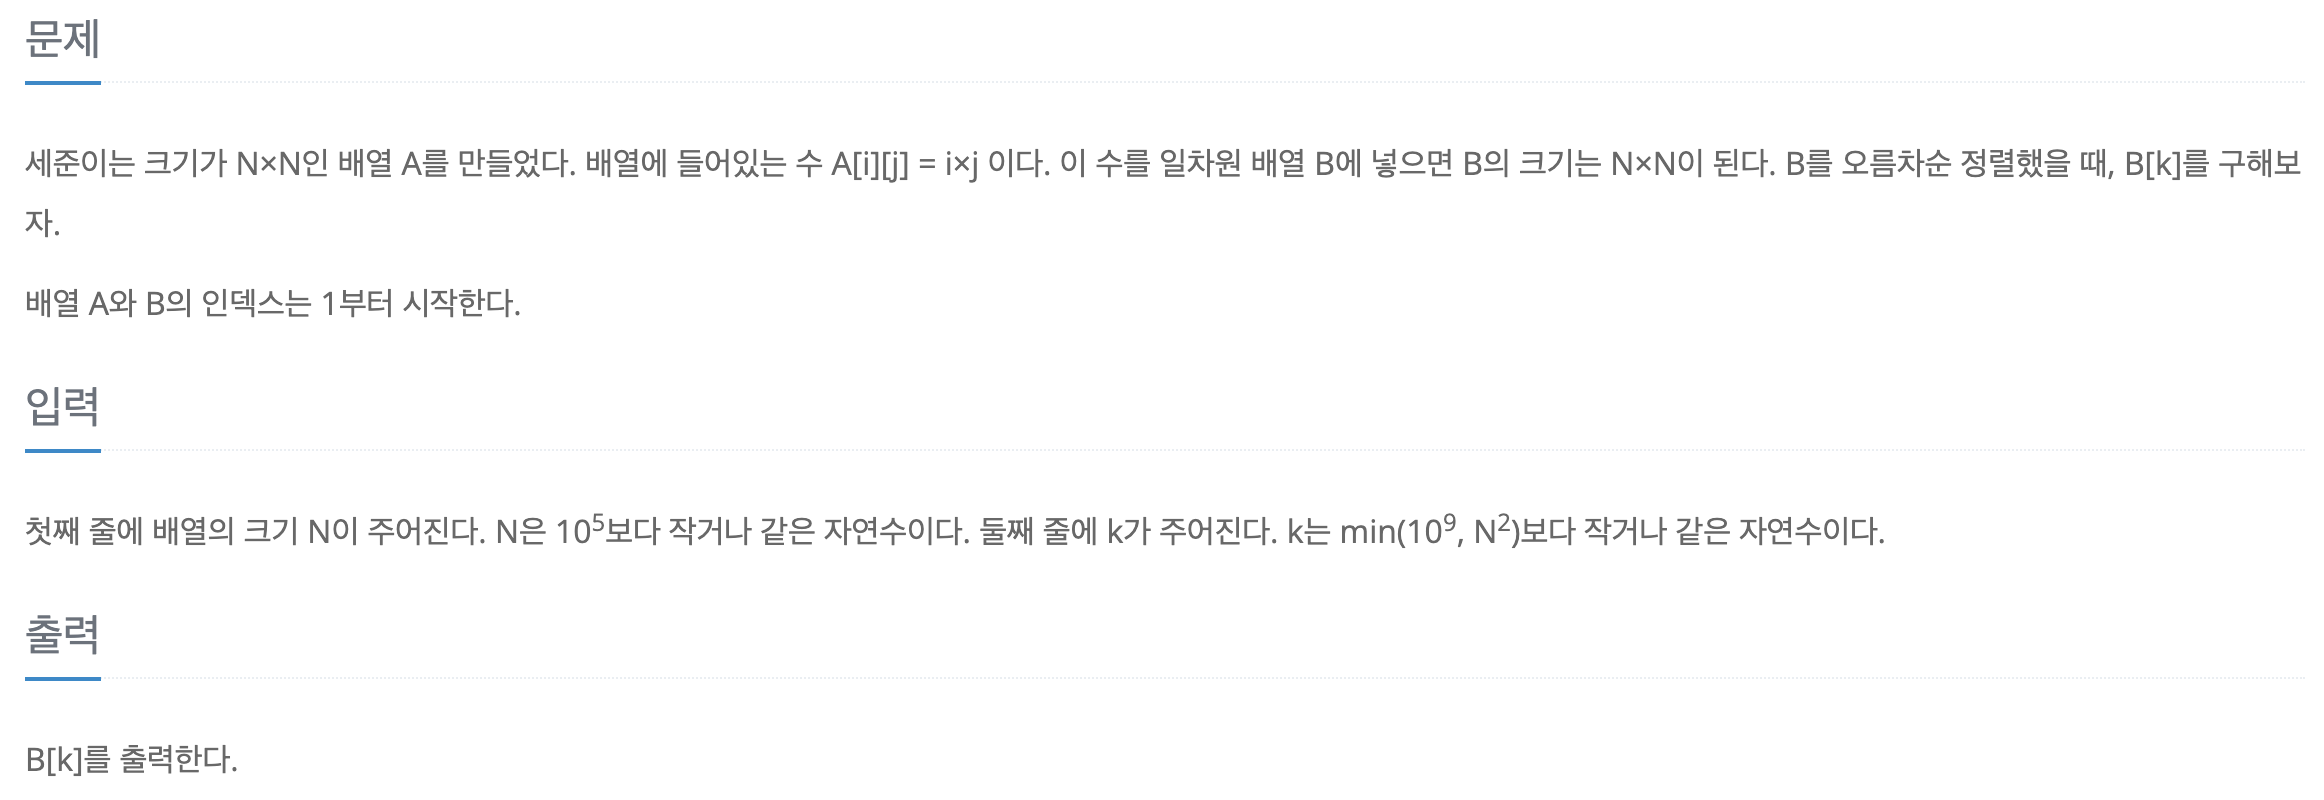

문제 요약

    첫줄에 배열의 크기 N이 주어지고 다음줄에 k가 주어집니다. 그러면 NxN 배열 A를 1차원 배열로 만들고 오름차순으로 정렬한 배열을 B라고 할 때, B[k]를 출력해야 합니다.
    이 떄 NxN 배열 A는 A[i][j] = ixj로 원소들이 있습니다. 예를들어 1행 1열은 1, 1행 2열은 2 이렇게 값이 들어있습니다.

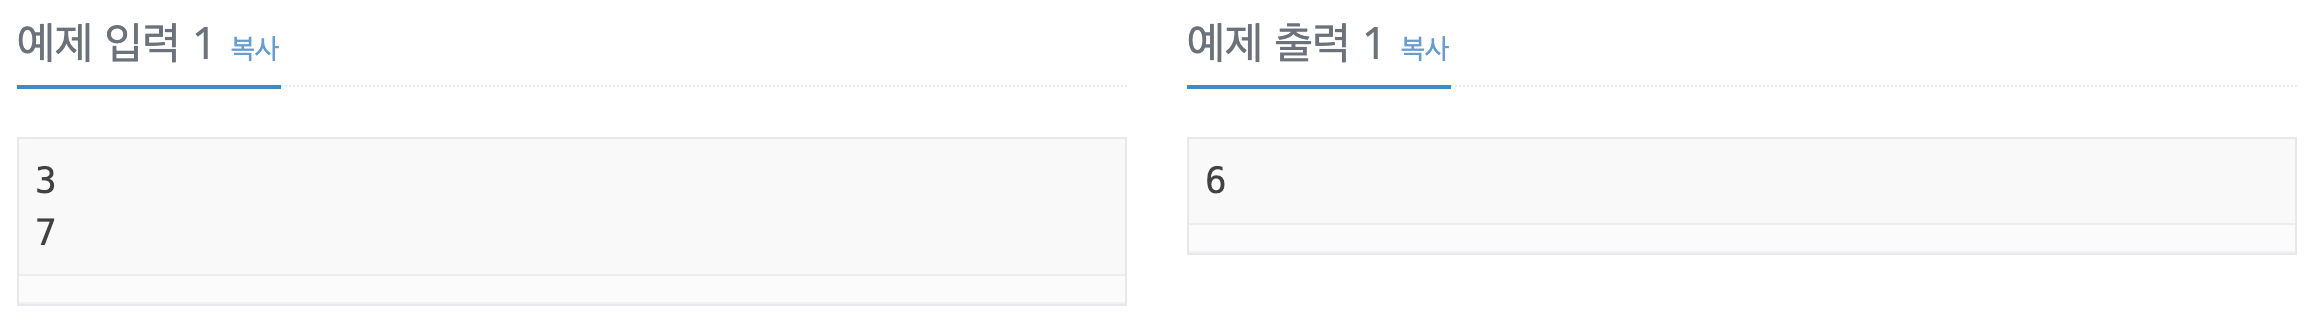

In [2]:
! # 끝 시간 체크

상상 코딩

    NxN을 일렬로 풀어 이진탐색으로 찾는것은 너무 오래걸린다.
    찾아야 할 것은 K라는 인덱스입니다.
    0부터 N*N까지 이진탐색을 하며 K라는 인덱스를 찾습니다.
    각 행은 오름차순으로 정렬되어 있기 때문에, 각 행을 돌며 bisect_right를 통해 원소의 개수를 찾습니다.
    각 행의 원소의 개수의 합이 곧 인덱스입니다. 왜냐하면 인덱스는 1부터 시작하기 때문입니다.
    그래서 원소 개수의 합이 K가 될때까지 이진탐색으로 찾습니다.
    첫행에는 1부터 모든 정수가 들어있기 때문에 항상 존재한다고 볼 수 있습니다.

### 풀이

In [53]:
N=int(input())
k=int(input())

s,e = 1,N*N
while s <= e:
    trg_value = (s+e)//2
    estimated_idx = sum(min(trg_value//i,N) for i in range(1,N+1))
    print(s,e,trg_value,estimated_idx)
    if estimated_idx >= k:
        result = trg_value
        e = trg_value-1
    else:
        s = trg_value+1
        
print(result)

3
7
1 9 5 6
6 9 7 8
6 6 6 8
6


In [54]:
N=int(input())
k=int(input())

s,e = 1,N*N
while s <= e:
    trg_value = (s+e)//2
    estimated_idx = sum(min(trg_value//i,N) for i in range(1,N+1))
    print(s,e,trg_value,estimated_idx)
    if estimated_idx <= k:
        result = trg_value
        s = trg_value+1
    else:
        e = trg_value-1
        
print(result)

3
7
1 9 5 6
6 9 7 8
6 6 6 8
5


In [38]:
trg

6

### 주석 달린 풀이

In [50]:
N=int(input()) # 배열의 크기 N
k=int(input()) # 배열을 flatten했을 때, 출력해야할 인덱스

s,e = 1,N*N # 이분탐색 시작 1~N*N (시작인덱스가 1부터)
while s <= e:
    trg_value = (s+e)//2 # B[k]값으로 찾아야할 타겟 값
    # 각 행에서 trg_value이하인 값들의 개수 → 추정 인덱스
    estimated_idx = sum(min(trg_value//i,N) for i in range(1,N+1))
    print(s,e,estimated_idx,trg_value)
    if estimated_idx >= k: # 추정 인덱스가 찾는 인덱스보다 크거나 같으면
        e = trg_value-1 # 더 작은쪽(왼쪽)을 봐야되서 end를 땡겨온다.
        result = trg_value # 추정 인덱스가 찾는 인덱스보다 컸다가, 작아지는 방향에서 s와e가 같아지면 trg_value가 같은 왼쪽에 있는 인덱스가 찾는 인덱스
    else: # 추정 인덱스가 찾는 인덱스(k)보다 작으면 
        s = trg_value+1 # 오른쪽(큰쪽) 보기
        
print(result)

3
7
1 9 6 5
6 9 8 7
6 6 8 6
6


### 연습

In [27]:
def num_count(num):
    cnt = 0
    for i in range(1,N+1):
        if num // i > 0:
            cnt += min(num//i,N)
        else:
            break
    return cnt

In [28]:
N=3
k=7

In [29]:
s,e=0,N*N

In [30]:
while s<=e:
    trg = (s+e)//2
    estimated_idx = num_count(trg)
    if estimated_idx <= k:
        result=estimated_idx
        s = trg+1
    else:
        e = trg=1

In [31]:
result

6